In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,47852,Manhattan,40.74316,-73.98038,Private room,400,2,0,NaN,270096906,1,1
2866,21978,Manhattan,40.73523,-73.99465,Private room,180,3,2,0.07,97266110,1,1
2867,23485,Manhattan,40.76619,-73.98987,Entire home/apt,179,3,17,0.67,10903067,1,0
2868,16757,Manhattan,40.74637,-73.97207,Private room,200,30,0,NaN,2856748,49,1


In [ ]:
df_test

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2
...,...,...,...,...,...,...,...,...,...,...,...
713,26801,Bronx,40.84590,-73.91558,Entire home/apt,77,2,36,1.81,153826581,1
714,20110,Brooklyn,40.71026,-73.94744,Entire home/apt,145,3,43,1.36,4198285,1
715,31383,Manhattan,40.71390,-73.99120,Entire home/apt,90,2,60,4.35,151507961,1
716,47135,Manhattan,40.74399,-73.97204,Private room,200,30,0,NaN,221200420,23


In [ ]:
df_train.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [ ]:
df_train.isna().sum()

,0
id,0
region,0
latitude,0
longitude,0
accommodation_type,0
cost,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,676
owner_id,0


In [ ]:
df_test.info()
df_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  718 non-null    int64  
 1   region              718 non-null    object 
 2   latitude            718 non-null    float64
 3   longitude           718 non-null    float64
 4   accommodation_type  718 non-null    object 
 5   cost                718 non-null    int64  
 6   minimum_nights      718 non-null    int64  
 7   number_of_reviews   718 non-null    int64  
 8   reviews_per_month   545 non-null    float64
 9   owner_id            718 non-null    int64  
 10  owned_hotels        718 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 61.8+ KB


,0
id,0
region,0
latitude,0
longitude,0
accommodation_type,0
cost,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,173
owner_id,0


In [ ]:
train = df_train.fillna(0)
test = df_test.fillna(0)
test


,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,0.00,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2
...,...,...,...,...,...,...,...,...,...,...,...
713,26801,Bronx,40.84590,-73.91558,Entire home/apt,77,2,36,1.81,153826581,1
714,20110,Brooklyn,40.71026,-73.94744,Entire home/apt,145,3,43,1.36,4198285,1
715,31383,Manhattan,40.71390,-73.99120,Entire home/apt,90,2,60,4.35,151507961,1
716,47135,Manhattan,40.74399,-73.97204,Private room,200,30,0,0.00,221200420,23


In [ ]:
train = pd.get_dummies(train, dtype=int)
test = pd.get_dummies(test, dtype=int)

In [ ]:
train

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,0,1,0,0,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,0,1,0,0,0,1,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,1,0,0,0,1,0,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,1,0,0,1,0,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,47852,40.74316,-73.98038,400,2,0,0.00,270096906,1,1,0,0,1,0,0,0,1,0
2866,21978,40.73523,-73.99465,180,3,2,0.07,97266110,1,1,0,0,1,0,0,0,1,0
2867,23485,40.76619,-73.98987,179,3,17,0.67,10903067,1,0,0,0,1,0,0,1,0,0
2868,16757,40.74637,-73.97207,200,30,0,0.00,2856748,49,1,0,0,1,0,0,0,1,0


In [ ]:
test

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,19215,40.70912,-73.94513,135,2,22,0.66,4360212,1,0,1,0,0,0,0,0,1
1,36301,40.57646,-73.96641,69,2,8,0.90,181356989,2,0,1,0,0,0,1,0,0
2,40566,40.76616,-73.98228,225,30,0,0.00,13773574,12,0,0,1,0,0,0,1,0
3,33694,40.77668,-73.94587,125,30,9,0.82,6788748,1,0,0,1,0,0,0,0,1
4,28873,40.80279,-73.94450,43,1,13,0.72,105061915,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,26801,40.84590,-73.91558,77,2,36,1.81,153826581,1,1,0,0,0,0,1,0,0
714,20110,40.71026,-73.94744,145,3,43,1.36,4198285,1,0,1,0,0,0,1,0,0
715,31383,40.71390,-73.99120,90,2,60,4.35,151507961,1,0,0,1,0,0,1,0,0
716,47135,40.74399,-73.97204,200,30,0,0.00,221200420,23,0,0,1,0,0,0,1,0


In [ ]:
train = train.drop(['id', 'owner_id'], axis=1)
test = test.drop(['id', 'owner_id'], axis=1)

In [ ]:
train

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.71854,-74.00439,170,5,7,0.56,1,0,0,0,1,0,0,1,0,0
1,40.64446,-73.95030,65,3,238,2.30,1,0,0,1,0,0,0,1,0,0
2,40.78573,-73.81062,85,1,0,0.00,1,1,0,0,0,1,0,0,1,0
3,40.73863,-73.98002,210,30,0,0.00,65,1,0,0,1,0,0,0,1,0
4,40.82426,-73.94630,75,3,38,0.42,3,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,400,2,0,0.00,1,1,0,0,1,0,0,0,1,0
2866,40.73523,-73.99465,180,3,2,0.07,1,1,0,0,1,0,0,0,1,0
2867,40.76619,-73.98987,179,3,17,0.67,1,0,0,0,1,0,0,1,0,0
2868,40.74637,-73.97207,200,30,0,0.00,49,1,0,0,1,0,0,0,1,0


In [ ]:
test

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.70912,-73.94513,135,2,22,0.66,1,0,1,0,0,0,0,0,1
1,40.57646,-73.96641,69,2,8,0.90,2,0,1,0,0,0,1,0,0
2,40.76616,-73.98228,225,30,0,0.00,12,0,0,1,0,0,0,1,0
3,40.77668,-73.94587,125,30,9,0.82,1,0,0,1,0,0,0,0,1
4,40.80279,-73.94450,43,1,13,0.72,2,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,40.84590,-73.91558,77,2,36,1.81,1,1,0,0,0,0,1,0,0
714,40.71026,-73.94744,145,3,43,1.36,1,0,1,0,0,0,1,0,0
715,40.71390,-73.99120,90,2,60,4.35,1,0,0,1,0,0,1,0,0
716,40.74399,-73.97204,200,30,0,0.00,23,0,0,1,0,0,0,1,0


In [ ]:
cor = train.corr()
cor

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
latitude,1.000000,0.049337,0.009657,0.010614,0.006295,0.015358,0.064103,-0.025119,0.352369,-0.678672,0.575303,-0.013750,-0.159718,0.004284,0.000188,-0.005122
longitude,0.049337,1.000000,-0.136140,-0.074862,0.006381,0.052653,-0.142529,0.119882,0.233485,-0.004712,-0.474424,0.651172,-0.248123,-0.062670,0.048603,0.013993
cost,0.009657,-0.136140,1.000000,0.052918,-0.074432,-0.123086,0.032185,0.147576,-0.046705,-0.084543,0.141398,-0.066359,0.003322,-0.113357,0.126273,-0.020195
minimum_nights,0.010614,-0.074862,0.052918,1.000000,-0.088767,-0.139803,0.107893,0.173550,-0.025758,-0.045813,0.071547,-0.026489,-0.006379,-0.129518,0.166778,-0.049767
number_of_reviews,0.006295,0.006381,-0.074432,-0.088767,1.000000,0.576553,-0.112328,-0.191645,0.005239,0.053843,-0.032103,-0.026691,-0.028090,0.255994,-0.177441,-0.082181
reviews_per_month,0.015358,0.052653,-0.123086,-0.139803,0.576553,1.000000,-0.147011,-0.312213,0.022862,0.021694,-0.042358,0.022218,-0.007715,0.321488,-0.300600,-0.010960
owned_hotels,0.064103,-0.142529,0.032185,0.107893,-0.112328,-0.147011,1.000000,0.191906,-0.035747,-0.156839,0.209776,-0.064695,-0.017487,-0.101230,0.138570,-0.048646
yearly_availability,-0.025119,0.119882,0.147576,0.173550,-0.191645,-0.312213,0.191906,1.000000,0.077609,-0.079190,-0.019062,0.094650,0.050205,-0.645568,0.690654,-0.081234
region_Bronx,0.352369,0.233485,-0.046705,-0.025758,0.005239,0.022862,-0.035747,0.077609,1.000000,-0.129349,-0.155657,-0.064301,-0.011702,-0.032510,0.059385,-0.033279
region_Brooklyn,-0.678672,-0.004712,-0.084543,-0.045813,0.053843,0.021694,-0.156839,-0.079190,-0.129349,1.000000,-0.720693,-0.297716,-0.054182,0.070504,-0.092917,0.029619


In [ ]:
cor.index

Index(['latitude', 'longitude', 'cost', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'owned_hotels', 'yearly_availability',
       'region_Bronx', 'region_Brooklyn', 'region_Manhattan', 'region_Queens',
       'region_Staten Island', 'accommodation_type_Entire home/apt',
       'accommodation_type_Private room', 'accommodation_type_Shared room'],
      dtype='object')

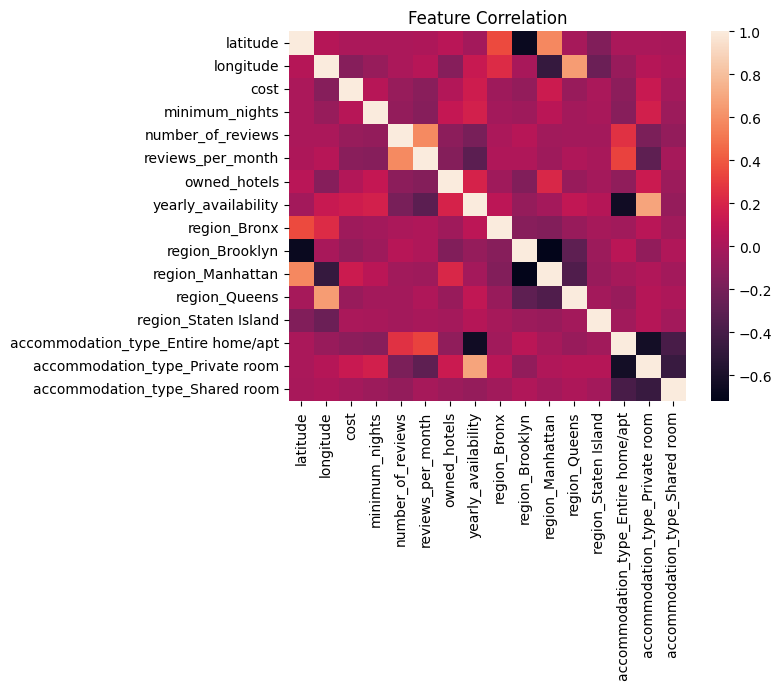

In [ ]:
ax = plt.axes()
sns.heatmap(cor, ax=ax)
ax.set_title('Feature Correlation')
plt.show()

In [ ]:
cor['yearly_availability'].sort_values(ascending=False)

,yearly_availability
yearly_availability,1.000000
accommodation_type_Private room,0.690654
owned_hotels,0.191906
minimum_nights,0.173550
cost,0.147576
longitude,0.119882
region_Queens,0.094650
region_Bronx,0.077609
region_Staten Island,0.050205
region_Manhattan,-0.019062


In [ ]:
cor.sort_values('yearly_availability', ascending=False).index

Index(['yearly_availability', 'accommodation_type_Private room',
       'owned_hotels', 'minimum_nights', 'cost', 'longitude', 'region_Queens',
       'region_Bronx', 'region_Staten Island', 'region_Manhattan', 'latitude',
       'region_Brooklyn', 'accommodation_type_Shared room',
       'number_of_reviews', 'reviews_per_month',
       'accommodation_type_Entire home/apt'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'yearly_availability'),
  Text(1, 0, 'accommodation_type_Private room'),
  Text(2, 0, 'owned_hotels'),
  Text(3, 0, 'minimum_nights'),
  Text(4, 0, 'cost'),
  Text(5, 0, 'longitude'),
  Text(6, 0, 'region_Queens'),
  Text(7, 0, 'region_Bronx'),
  Text(8, 0, 'region_Staten Island'),
  Text(9, 0, 'region_Manhattan'),
  Text(10, 0, 'latitude'),
  Text(11, 0, 'region_Brooklyn'),
  Text(12, 0, 'accommodation_type_Shared room'),
  Text(13, 0, 'number_of_reviews'),
  Text(14, 0, 'reviews_per_month'),
  Text(15, 0, 'accommodation_type_Entire home/apt')])

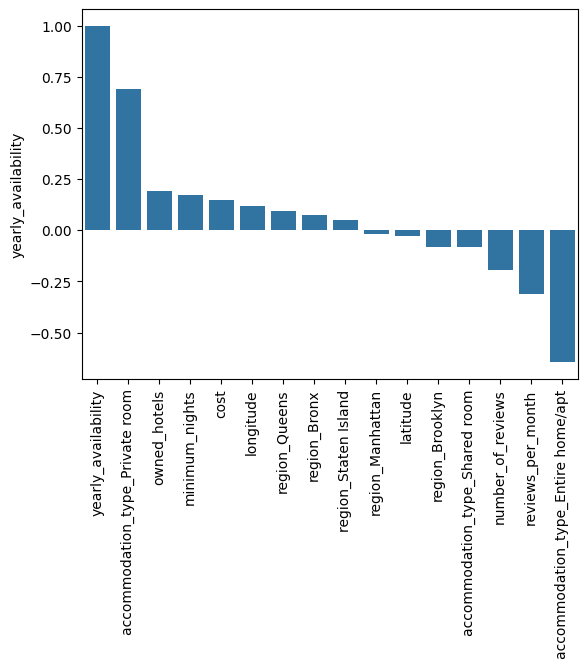

In [ ]:

sns.barplot(data=cor['yearly_availability'].sort_values(ascending=False), order=cor['yearly_availability'].sort_values(ascending=False).index)
plt.xticks(rotation=90)

In [ ]:
y = train['yearly_availability']
x = train.drop('yearly_availability', axis=1)

In [ ]:
x

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,40.71854,-74.00439,170,5,7,0.56,1,0,0,1,0,0,1,0,0
1,40.64446,-73.95030,65,3,238,2.30,1,0,1,0,0,0,1,0,0
2,40.78573,-73.81062,85,1,0,0.00,1,0,0,0,1,0,0,1,0
3,40.73863,-73.98002,210,30,0,0.00,65,0,0,1,0,0,0,1,0
4,40.82426,-73.94630,75,3,38,0.42,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,40.74316,-73.98038,400,2,0,0.00,1,0,0,1,0,0,0,1,0
2866,40.73523,-73.99465,180,3,2,0.07,1,0,0,1,0,0,0,1,0
2867,40.76619,-73.98987,179,3,17,0.67,1,0,0,1,0,0,1,0,0
2868,40.74637,-73.97207,200,30,0,0.00,49,0,0,1,0,0,0,1,0


In [ ]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,0.539921,0.457591,0.016018,0.004008,0.017722,0.054002,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.350772,0.561387,0.005506,0.002004,0.602532,0.221794,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.711477,0.829425,0.007508,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.591217,0.504356,0.020022,0.029058,0.000000,0.000000,0.196319,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.809856,0.569063,0.006507,0.002004,0.096203,0.040501,0.006135,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0.602783,0.503665,0.039043,0.001002,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2866,0.582535,0.476282,0.017019,0.002004,0.005063,0.006750,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2867,0.661586,0.485454,0.016919,0.002004,0.043038,0.064609,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2868,0.610979,0.519612,0.019021,0.029058,0.000000,0.000000,0.147239,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y

,yearly_availability
0,0
1,0
2,1
3,1
4,1
...,...
2865,1
2866,1
2867,0
2868,1


In [ ]:
y.value_counts(normalize=True) *100

,proportion
yearly_availability,
0,50.139373
1,49.860627


In [ ]:
y.values

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:
lin = LinearRegression()
log = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgboost = XGBClassifier()

In [ ]:
lin.fit(x[:2000],y[:2000])
log.fit(x[:2000],y[:2000])
rf.fit(x[:2000],y[:2000])
xgboost.fit(x[:2000],y[:2000])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
logpred = log.predict(x[2000:])
rfpred = rf.predict(x[2000:])
xgpred = xgboost.predict(x[2000:])

In [ ]:
logpred

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
rfpred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,

In [ ]:
xgpred

array([0, 0, 1, ..., 0, 1, 1])

In [ ]:

accuracy_score(y[2000:].values, xgpred)

0.9126436781609195

In [ ]:
accuracy_score(y[2000:].values, logpred)


0.8689655172413793

In [ ]:
accuracy_score(y[2000:].values, rfpred)

0.9310344827586207

In [ ]:
ans = log.predict(test)

In [ ]:
ids = pd.DataFrame(np.arange(len(ans)))
ans = pd.DataFrame(ans)
sub = pd.concat([ids,ans], axis=1)
sub

,0,0
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
713,713,0
714,714,0
715,715,0
716,716,1


In [ ]:
sub.to_csv('submission.csv', index=False)

accommodation_type_Private room       0.226245
accommodation_type_Entire home/apt    0.196481
owned_hotels                          0.128292
reviews_per_month                     0.084052
accommodation_type_Shared room        0.073809
number_of_reviews                     0.072713
longitude                             0.054276
latitude                              0.051141
cost                                  0.050341
minimum_nights                        0.045675
region_Queens                         0.004389
region_Brooklyn                       0.004339
region_Manhattan                      0.004179
region_Bronx                          0.003999
region_Staten Island                  0.000068
dtype: float64


<Axes: >

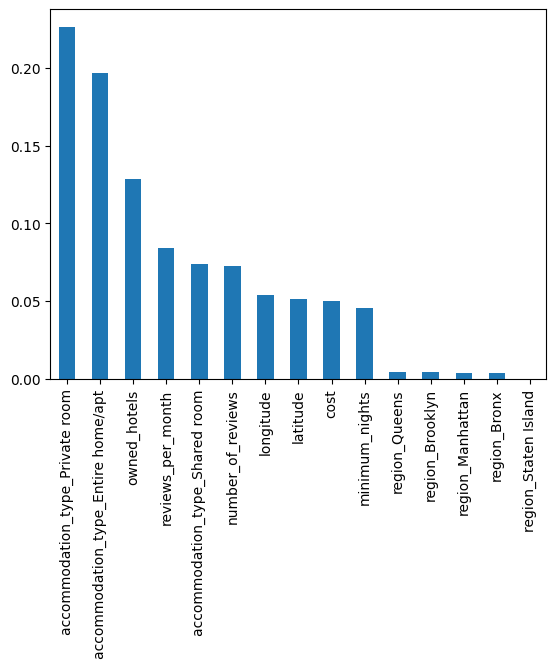

In [ ]:
importances=rf.feature_importances_
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)
print(feature_importance)
feature_importance.plot(kind='bar')

accommodation_type_Private room       0.609526
accommodation_type_Entire home/apt    0.134690
owned_hotels                          0.114279
region_Bronx                          0.026313
region_Queens                         0.018554
reviews_per_month                     0.014503
number_of_reviews                     0.013304
minimum_nights                        0.012148
cost                                  0.011267
latitude                              0.010481
region_Brooklyn                       0.009521
longitude                             0.009460
accommodation_type_Shared room        0.008258
region_Manhattan                      0.007697
region_Staten Island                  0.000000
dtype: float32


<Axes: >

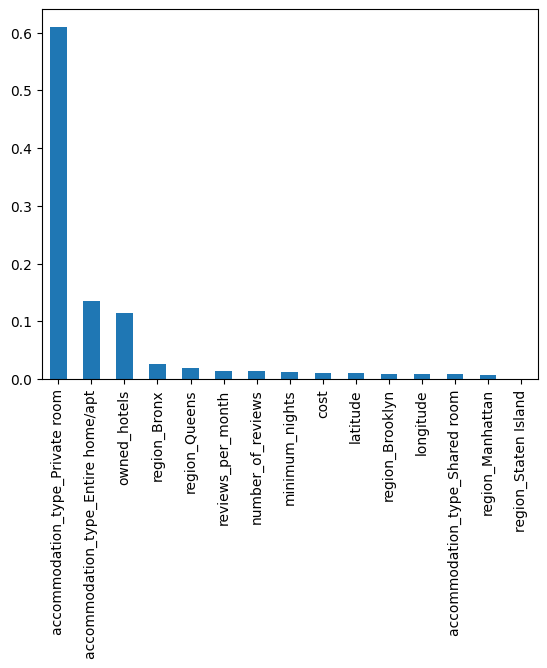

In [ ]:
importances=xgboost.feature_importances_
feature_importance = pd.Series(importances, index=x.columns).sort_values(ascending=False)
print(feature_importance)
feature_importance.plot(kind='bar')